In [1]:
import pandas as pd
import requests
import re

In [2]:
df=pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [4]:
# response=requests.get("https://data.cityofnewyork.us/resource/h9gi-nx95.json")
# data=response.json()

In [5]:
df.shape

(1807331, 29)

In [6]:
df['CRASH DATE']=pd.to_datetime(df['CRASH DATE'])

In [7]:
df.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [8]:
df=df.sort_values('CRASH DATE',ascending=False).reset_index(drop=True)

In [9]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-08-03,21:45,QUEENS,11411,40.687300,-73.733100,"(40.6873, -73.7331)",120 AVENUE,231 STREET,NaN,...,NaN,NaN,NaN,NaN,4443473,Sedan,NaN,NaN,NaN,NaN
1,2021-08-03,17:01,NaN,NaN,40.836090,-73.870390,"(40.83609, -73.87039)",CROSS BRONX EXPY,NaN,NaN,...,NaN,NaN,NaN,NaN,4443633,Sedan,NaN,NaN,NaN,NaN
2,2021-08-03,8:00,MANHATTAN,10282,40.717743,-74.014090,"(40.717743, -74.01409)",NaN,NaN,345 CHAMBERS STREET,...,Unspecified,NaN,NaN,NaN,4443446,Bus,NaN,NaN,NaN,NaN
3,2021-08-03,8:35,NaN,NaN,NaN,NaN,NaN,JAY STREET,SANDS STREET,NaN,...,NaN,NaN,NaN,NaN,4443469,Bike,NaN,NaN,NaN,NaN
4,2021-08-03,0:00,MANHATTAN,10030,40.821262,-73.946080,"(40.821262, -73.94608)",WEST 141 STREET,SAINT NICHOLAS AVENUE,NaN,...,Turning Improperly,NaN,NaN,NaN,4443776,Bike,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807326,2012-07-01,21:35,QUEENS,11375,40.721678,-73.835965,"(40.7216784, -73.8359648)",GRND CNTRL PARKWAY SR WEST,72 ROAD,NaN,...,Unspecified,NaN,NaN,NaN,264082,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1807327,2012-07-01,16:22,BROOKLYN,11238,40.683726,-73.967961,"(40.6837264, -73.9679609)",FULTON STREET,VANDERBILT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,191550,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1807328,2012-07-01,17:30,MANHATTAN,10035,40.807598,-73.937179,"(40.8075979, -73.9371788)",EAST 129 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,59632,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1807329,2012-07-01,16:41,QUEENS,11433,40.707929,-73.783825,"(40.7079288, -73.783825)",JAMAICA AVENUE,177 STREET,NaN,...,Turning Improperly,NaN,NaN,NaN,208727,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


<AxesSubplot:>

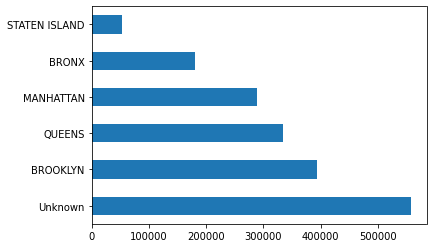

In [10]:
df['BOROUGH'].fillna("Unknown").value_counts().plot(kind='barh')

In [11]:
df['ZIP CODE'].fillna("Unknown").value_counts()

Unknown    557415
11207.0     16272
11236.0     11948
11234.0     11097
11101.0     11075
            ...  
10048           1
10176.0         1
10055.0         1
10166.0         1
11241.0         1
Name: ZIP CODE, Length: 423, dtype: int64

In [12]:
df['CROSS STREET NAME'].fillna("Unknown").value_counts()

Unknown                             644169
3 AVENUE                              9843
BROADWAY                              9685
2 AVENUE                              8421
5 AVENUE                              7051
                                     ...  
OSTEND PLACE                             1
Arthur Kill Road                         1
EAST 189 ST                              1
MERRY MOUNT STREET                       1
SELMOFF LANE                             1
Name: CROSS STREET NAME, Length: 19093, dtype: int64

In [13]:
df.groupby('CROSS STREET NAME')['NUMBER OF PEDESTRIANS KILLED'].count().sort_values()

CROSS STREET NAME
�ST 138 STREET                        1
EAST 11 ROAD                           1
EAST 10TH STREET                       1
TROON ROAD                             1
EAST 108                               1
                                    ... 
7 AVENUE                            6634
5 AVENUE                            7051
2 AVENUE                            8421
BROADWAY                            9685
3 AVENUE                            9843
Name: NUMBER OF PEDESTRIANS KILLED, Length: 19092, dtype: int64

In [14]:
df['year']=df['CRASH DATE'].astype(str).str.split("-")[0][0]

In [15]:
df['year']=df['CRASH DATE'].astype(str).str.extract(r'(\d{4})')

In [16]:
df['month']=df['CRASH DATE'].astype(str).str.extract(r'(\d{4}-\d{2})')

In [17]:
df.year.value_counts()

2018    231563
2017    231008
2016    229831
2015    217694
2019    211483
2014    206033
2013    203734
2020    112880
2012    100543
2021     62562
Name: year, dtype: int64

<AxesSubplot:xlabel='month'>

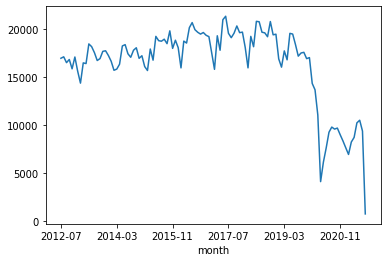

In [38]:
df.groupby(['month'])['COLLISION_ID'].count().plot()

In [63]:
person_deaths=df[['COLLISION_ID', 'year', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS KILLED']].dropna()



In [55]:
df[df["NUMBER OF PERSONS KILLED"]>0]["NUMBER OF PERSONS KILLED"].sum()

2341.0

In [56]:
df[df["NUMBER OF PEDESTRIANS KILLED"]>0]["NUMBER OF PEDESTRIANS KILLED"].sum()

1217

In [61]:
df.groupby('year')["NUMBER OF PERSONS KILLED"].sum()

year
2012    137.0
2013    297.0
2014    262.0
2015    243.0
2016    246.0
2017    256.0
2018    230.0
2019    244.0
2020    268.0
2021    158.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [68]:
person_deaths[person_deaths['NUMBER OF PERSONS KILLED']>0].reset_index(drop=True).to_csv("motor-deaths.csv", index=False)

In [77]:
df.groupby(['BOROUGH', 'ON STREET NAME'])['NUMBER OF PEDESTRIANS KILLED'].sum().reset_index()

,BOROUGH,ON STREET NAME,NUMBER OF PEDESTRIANS KILLED
0,BRONX,,0
1,BRONX,149TH STREET,0
2,BRONX,163 street,0
3,BRONX,169 street,0
4,BRONX,172nd,0
...,...,...,...
12912,STATEN ISLAND,rossville ave,0
12913,STATEN ISLAND,seaview avenue,0
12914,STATEN ISLAND,st marys avenue,0
12915,STATEN ISLAND,st pauls ave,0


In [78]:
# # This is just one of those things you cut-and-paste or memorize
# merged.groupby('neighborhood')['Primary Breed'] \
#     .value_counts() \
#     .groupby(level=0, group_keys=False) \
#     .nlargest(3) \
#     .to_frame()

# merged.groupby('borough')['Primary Breed'].value_counts() \
#     .groupby(level=0, group_keys=False) \
#     .nlargest(5) \
#     .to_frame(name='counts') \
#     .reset_index()

In [84]:
df.groupby(['BOROUGH','ON STREET NAME'])['NUMBER OF PERSONS KILLED'].sum().groupby(level=0, group_keys=False) \
    .nlargest(3)\
.to_frame(name='counts').reset_index()

,BOROUGH,ON STREET NAME,counts
0,BRONX,GRAND CONCOURSE,15.0
1,BRONX,EAST TREMONT AVENUE,10.0
2,BRONX,BOSTON ROAD,7.0
3,BROOKLYN,ATLANTIC AVENUE,17.0
4,BROOKLYN,3 AVENUE,14.0
5,BROOKLYN,FLATBUSH AVENUE,14.0
6,MANHATTAN,BROADWAY,10.0
7,MANHATTAN,WEST STREET,10.0
8,MANHATTAN,3 AVENUE,9.0
9,QUEENS,NORTHERN BOULEVARD,17.0


In [88]:
df.groupby(['BOROUGH','CROSS STREET NAME'])['NUMBER OF PEDESTRIANS KILLED'].sum().groupby(level=0, group_keys=False) \
    .nlargest(3)\
.to_frame(name='counts').reset_index()

,BOROUGH,CROSS STREET NAME,counts
0,BRONX,EAST 170 STREET,4
1,BRONX,EAST 138 STREET,3
2,BRONX,EAST 233 STREET,3
3,BROOKLYN,52 STREET,3
4,BROOKLYN,ATLANTIC AVENUE,3
5,BROOKLYN,FLATLANDS AVENUE,3
6,MANHATTAN,1 AVENUE,6
7,MANHATTAN,BROADWAY,6
8,MANHATTAN,WEST HOUSTON STREET,6
9,QUEENS,71 AVENUE,3
